#importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#uploading the train dataset 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


## Train dataset

In [3]:
train=pd.read_csv("train.csv")
train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


## Shape of the train dataset

In [4]:
train.shape

(14999, 9)

In [5]:
column_vidid=train['vidid']


## Exploratory Data Analysis and Data Cleaning

In [6]:
import datetime
import time

In [7]:
def checki(x):
        y = x[2:]
        h = ''
        m = ''
        s = ''
        mm = ''
        P = ['H','M','S']
        for i in y:
            if i not in P:
                mm+=i
            else:
                if(i=="H"):
                    h = mm
                    mm = ''
                elif(i == "M"):
                    m = mm
                    mm = ''
                else:
                    s = mm
                    mm = ''
        if(h==''):
            h = '00'
        if(m == ''):
            m = '00'
        if(s==''):
            s='00'
        bp = h+':'+m+':'+s
        return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
        h, m, s = time_string.split(':')
        return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
train["duration"]=time1
train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457,F
1,VID_14135,2,1707,56,2,6,2016-10-01,570,D
2,VID_2187,1,2023,25,0,2,2016-07-02,136,C
3,VID_23096,6,620860,777,161,153,2016-07-27,262,H
4,VID_10175,1,666,1,0,0,2016-06-29,31,D


In [8]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}

In [9]:
train['category']=train['category'].map(category)

In [10]:
from sklearn.preprocessing import LabelEncoder
#train['duration']=LabelEncoder().fit_transform(train['duration'])
train['vidid']=LabelEncoder().fit_transform(train['vidid'])
train['published']=LabelEncoder().fit_transform(train['published'])
train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,6078,40,1031602,8523,363,1095,2170,457,6
1,2869,2,1707,56,2,6,2187,570,4
2,8339,1,2023,25,0,2,2096,136,3
3,9215,6,620860,777,161,153,2121,262,8
4,123,1,666,1,0,0,2093,31,4


In [11]:
train=train[train.views!='F']
train=train[train.likes!='F']
train=train[train.dislikes!='F']
train=train[train.comment!='F']

In [12]:
train["views"] = pd.to_numeric(train["views"])
train["comment"] = pd.to_numeric(train["comment"])
train["likes"] = pd.to_numeric(train["likes"])
train["dislikes"] = pd.to_numeric(train["dislikes"])
train["adview"]=pd.to_numeric(train["adview"])

## Data Visualization

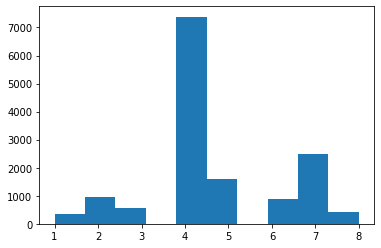

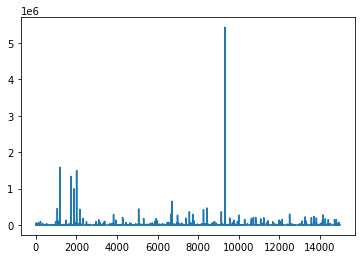

In [13]:
plt.hist(train["category"])
plt.show()
plt.plot(train["adview"])
plt.show()


In [14]:
train = train[train["adview"] <2000000]

In [15]:
train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,6078,40,1031602,8523,363,1095,2170,457,6
1,2869,2,1707,56,2,6,2187,570,4
2,8339,1,2023,25,0,2,2096,136,3
3,9215,6,620860,777,161,153,2121,262,8
4,123,1,666,1,0,0,2093,31,4


## Correlation Matrix and heatmap

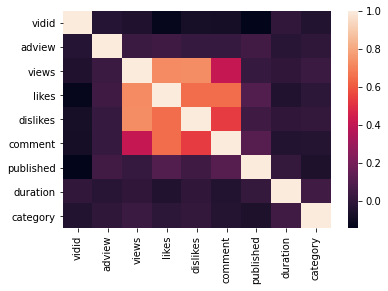

In [16]:
import seaborn as sns
corr = train.corr()


sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [17]:
train.corr()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
vidid,1.000000,-0.031181,-0.047544,-0.129052,-0.076376,-0.081150,-0.144683,0.007106,-0.040350
adview,-0.031181,1.000000,0.031177,0.046541,0.016686,0.017631,0.055650,-0.019592,-0.004910
views,-0.047544,0.031177,1.000000,0.726599,0.730216,0.410597,0.020111,0.002563,0.032822
likes,-0.129052,0.046541,0.726599,1.000000,0.648631,0.651215,0.096934,-0.042518,-0.009175
dislikes,-0.076376,0.016686,0.730216,0.648631,1.000000,0.532588,0.043739,0.001587,0.011355
comment,-0.081150,0.017631,0.410597,0.651215,0.532588,1.000000,0.114230,-0.037478,-0.034107
published,-0.144683,0.055650,0.020111,0.096934,0.043739,0.114230,1.000000,0.011990,-0.056831
duration,0.007106,-0.019592,0.002563,-0.042518,0.001587,-0.037478,0.011990,1.000000,0.049235
category,-0.040350,-0.004910,0.032822,-0.009175,0.011355,-0.034107,-0.056831,0.049235,1.000000


In [18]:
x=train.drop(['adview','vidid'],axis=1)
y=train.adview

## Splitting the dataset into train and test set for making the predictive model

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape

(11708, 7)

## Normalisation 

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [21]:
X_train.mean()

0.17394777121189706

## Function to calculate the error for various models trained

In [22]:
from sklearn import metrics
def print_error(X_test,Y_test,model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(Y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))
        

# Linear Regression

In [23]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(X_test,Y_test, linear_regression)


Mean Absolute Error: 3707.324322744839
Mean Squared Error: 835663919.3675851
Root Mean Squared Error: 28907.85220952233


# Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,Y_train)
print_error(X_test,Y_test,supportvector_regressor)

Mean Absolute Error: 1696.9438768920095
Mean Squared Error: 833685776.375659
Root Mean Squared Error: 28873.617306732784


# Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
print_error(X_test,Y_test, decision_tree)

Mean Absolute Error: 2653.1062158469945
Mean Squared Error: 883059099.5679644
Root Mean Squared Error: 29716.310328975305


# Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,Y_train)
print_error(X_test,Y_test, random_forest)

Mean Absolute Error: 3266.8175650564654
Mean Squared Error: 612756014.122523
Root Mean Squared Error: 24753.909067509376


# Artificial Neural Network(ANN)

In [27]:
import keras

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
ann=Sequential()
ann.add(Dense(6, activation="relu",input_shape=X_train.shape[1:]))
ann.add(Dense(6,activation="relu"))
ann.add(Dense(1))

optimizer=Adam(lr=0.001, decay=1e-6)
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,Y_train,epochs=100)
ann.summary()
print_error(X_test,Y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767407232.0000 - mean_squared_error: 767407232.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767403648.0000 - mean_squared_error: 767403648.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767399936.0000 - mean_squared_error: 767399936.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767393856.0000 - mean_squared_error: 767393856.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767381120.0000 - mean_squared_error: 767381120.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767361856.0000 - mean_squared_error: 767361856.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767338688.0000 - mean_squared_error: 767338688.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767308736.0000 - mean_squared_error:

In [28]:
# Looking at the above models it has been analyzed that RandomForest is the best model with least root mean squared error

# Saving the weights of the ANN model and Random forest model(best)

In [29]:
#Saving Scikitlearn models
import joblib
joblib.dump(random_forest, "random_forest_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

## Importing the test dataset for predictions

In [33]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [34]:
test=pd.read_csv("test.csv")
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


# Performing similar steps to clean and Normalise the test dataset as we performed for train dataset

In [35]:
def checki(x):
        y = x[2:]
        h = ''
        m = ''
        s = ''
        mm = ''
        P = ['H','M','S']
        for i in y:
            if i not in P:
                mm+=i
            else:
                if(i=="H"):
                    h = mm
                    mm = ''
                elif(i == "M"):
                    m = mm
                    mm = ''
                else:
                    s = mm
                    mm = ''
        if(h==''):
            h = '00'
        if(m == ''):
            m = '00'
        if(s==''):
            s='00'
        bp = h+':'+m+':'+s
        return bp
test=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
        h, m, s = time_string.split(':')
        return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
test["duration"]=time1
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,449,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,389,F
2,VID_13967,28534,31,11,1,2014-03-10,2274,D
3,VID_19442,1316715,2284,250,274,2010-06-05,595,G
4,VID_770,1893173,2519,225,116,2016-09-03,188,B


In [36]:
test['category']=test['category'].map(category)

In [37]:
from sklearn.preprocessing import LabelEncoder
#train['duration']=LabelEncoder().fit_transform(train['duration'])
test['vidid']=LabelEncoder().fit_transform(test['vidid'])
test['published']=LabelEncoder().fit_transform(test['published'])
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,232,440238,6153,218,1377,2055,449,2
1,3529,1040132,8171,340,1047,1827,389,6
2,1653,28534,31,11,1,1010,2274,4
3,3866,1316715,2284,250,274,117,595,7
4,7846,1893173,2519,225,116,1894,188,2


In [38]:
test=test[test.views!='F']
test=test[test.likes!='F']
test=test[test.dislikes!='F']
test=test[test.comment!='F']

In [39]:
test["views"] = pd.to_numeric(test["views"])
test["comment"] = pd.to_numeric(test["comment"])
test["likes"] = pd.to_numeric(test["likes"])
test["dislikes"] = pd.to_numeric(test["dislikes"])


In [40]:
test1=test.drop(['vidid'],axis=1)

In [41]:
test1.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2055,449,2
1,1040132,8171,340,1047,1827,389,6
2,28534,31,11,1,1010,2274,4
3,1316715,2284,250,274,117,595,7
4,1893173,2519,225,116,1894,188,2


In [42]:
adview_pred=random_forest.predict(test1)

In [43]:
test['adview']=adview_pred

In [44]:
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category,adview
0,232,440238,6153,218,1377,2055,449,2,127183.992687
1,3529,1040132,8171,340,1047,1827,389,6,127183.992687
2,1653,28534,31,11,1,1010,2274,4,127183.992687
3,3866,1316715,2284,250,274,117,595,7,127183.992687
4,7846,1893173,2519,225,116,1894,188,2,127183.992687


In [45]:
predictions=pd.DataFrame()

# Creating predictions.csv to contain the colum adview (predictions)
# Completing the test.csv with the adview column(predictions)

In [46]:
predictions['adview prediction']=adview_pred

In [47]:
predictions.to_csv('predictions.csv',index=False)

In [48]:
test.to_csv('test.csv')